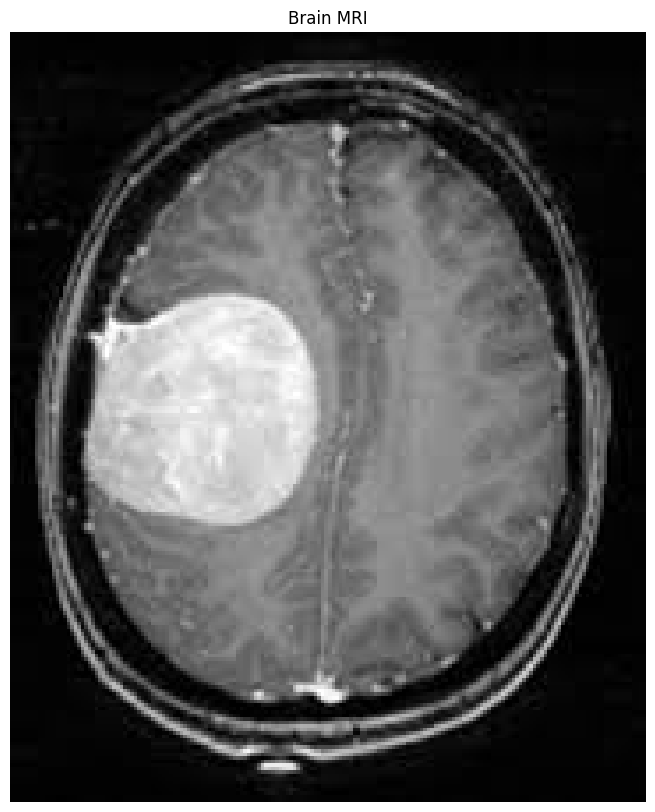

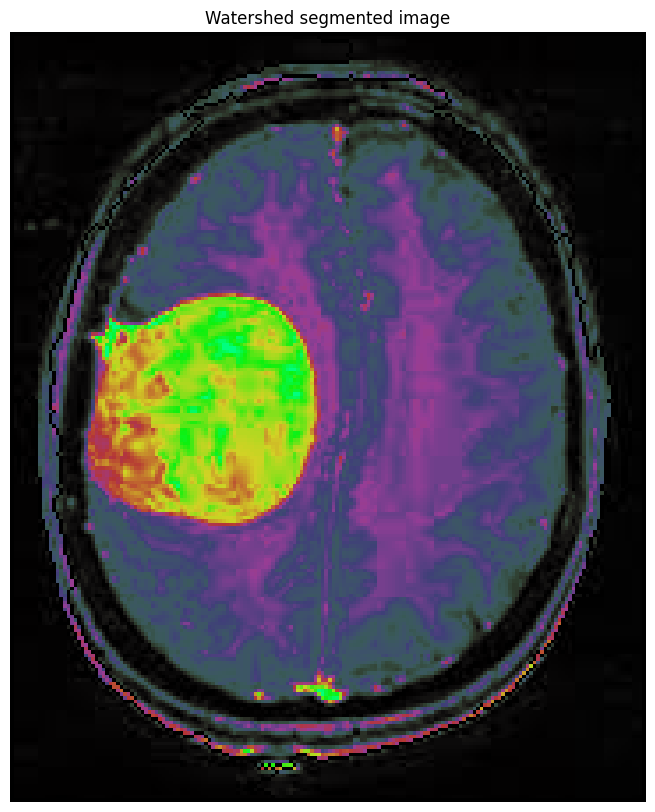

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import extrema
from skimage.segmentation import watershed as skwater

def ShowImage(title,img,ctype):
  plt.figure(figsize=(10, 10))
  if ctype=='bgr':
    b,g,r = cv2.split(img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.axis('off')
  plt.title(title)
  plt.show()
image = cv2.imread('Y1.jpg')
gray  = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ShowImage('Brain MRI',gray,'gray')

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
#ShowImage('Thresholding image',thresh,'gray')

ret, markers = cv2.connectedComponents(thresh)

#Get the area taken by each component. Ignore label 0 since this is the background.
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
#Get label of largest component by area
largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above                        
#Get pixels which correspond to the brain
brain_mask = markers==largest_component

brain_out = image.copy()
#In a copy of the original image, clear those pixels that don't correspond to the brain
brain_out[brain_mask==False] = (0,0,0)

img = cv2.imread('Y1.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
    
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
    
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
   
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
     
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

     
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

im1 = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
cv2.imwrite('Brain_Tumor_Segmentation.png',im1)
ShowImage('Watershed segmented image',im1,'gray')


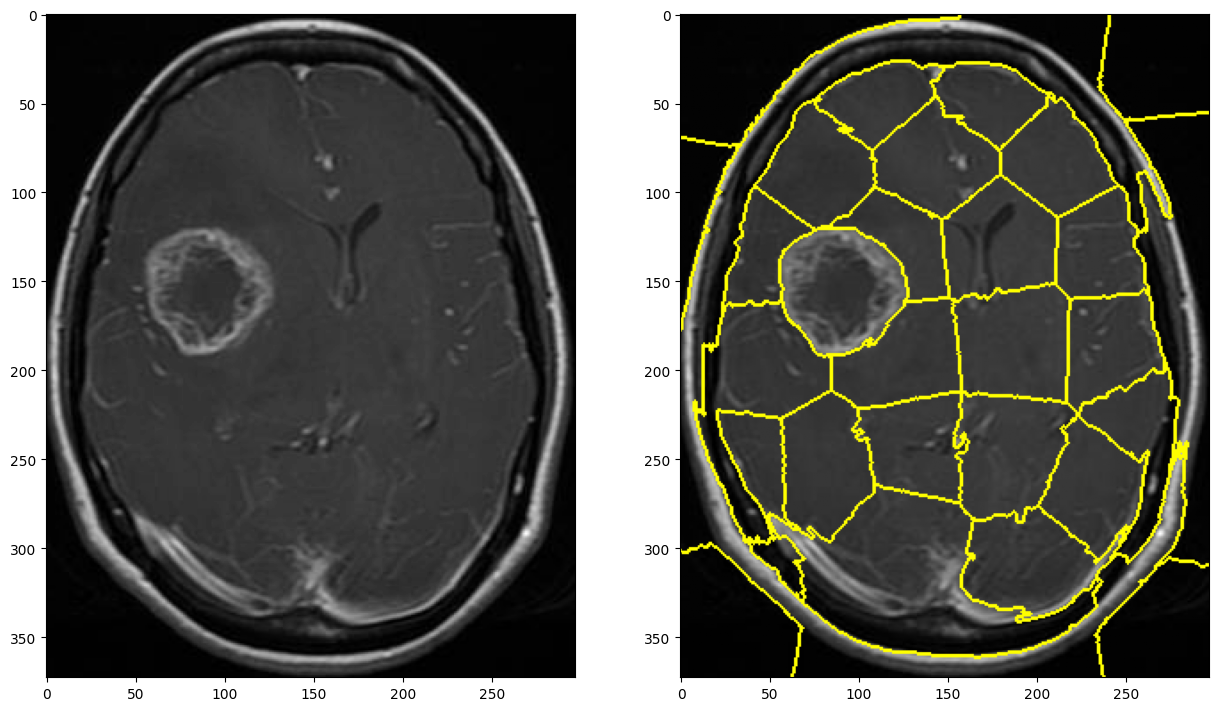

In [2]:
from skimage.segmentation import slic, mark_boundaries
import cv2
 
# Setting the plot figure as 15, 15
plt.figure(figsize=(15, 15))
 
# Sample Image of scikit-image package
img1=cv2.imread("Brain_Tumor_rogn.png",0)
 
# Applying SLIC segmentation
# for the edges to be drawn over
img_segments = slic(img1,n_segments=40,compactness=0.1)
 
plt.subplot(1, 2, 1)
 
# Plotting the original image
plt.imshow(img1, cmap='gray')
 
# Detecting boundaries for labels
plt.subplot(1, 2, 2)
 
# Plotting the output of marked_boundaries
# function i.e. the image with segmented boundaries
plt.imshow(mark_boundaries(img1, img_segments))

Text(0.5, 1.0, 'Watershed segmented image')

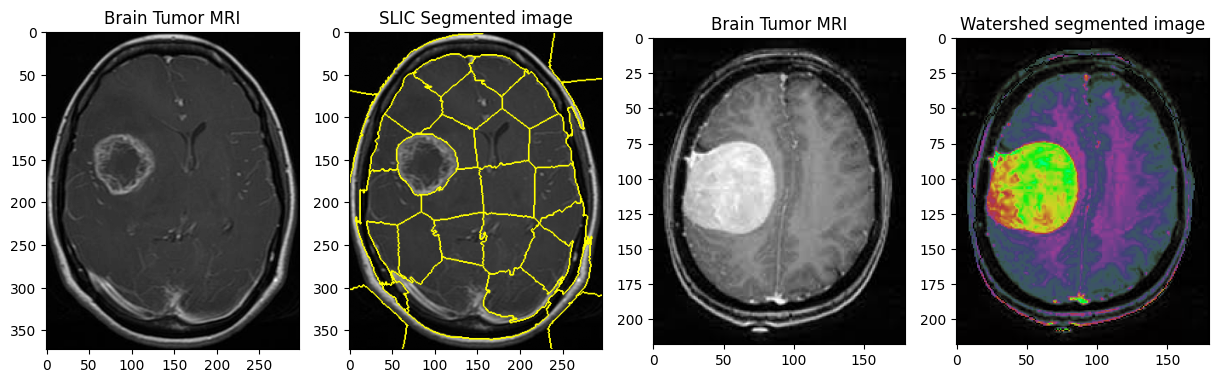

In [3]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 4, 1)
 
# Plotting the original image
plt.imshow(img1, cmap='gray')
plt.title('Brain Tumor MRI')
plt.subplot(1, 4, 2)
 
# Plotting the output of marked_boundaries
# function i.e. the image with segmented boundaries
plt.imshow(mark_boundaries(img1, img_segments))
plt.title('SLIC Segmented image')

plt.subplot(1,4,3)
plt.imshow(image,cmap='gray')
plt.title('Brain Tumor MRI')

plt.subplot(1,4,4)
plt.imshow(im1,cmap='gray')
plt.title('Watershed segmented image')

Méthode par seuil Multi Otsu

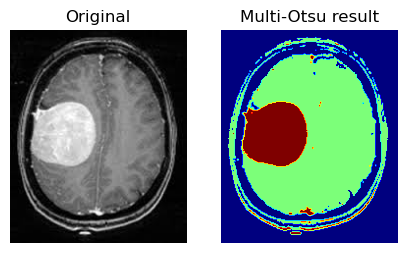

In [1]:
def threshold_segmentation(image): # Fonction Segmentation multi Otsu
  import matplotlib # Importation des librairies
  import matplotlib.pyplot as plt
  import numpy as np
  from skimage import data
  from skimage.filters import threshold_multiotsu
  import cv2
  image = cv2.imread(image, 0) #Chargement de l'image en niveau de gris
  thresholds = threshold_multiotsu(image) # Calcul de 3 seuils/thresholds via la fonction threshold_multi Otsu
  result = np.digitize(image, bins=thresholds) # Utilisation des seuils pour segmenter l'image en 3 classes/zones
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 3.5)) # Création d'une figure avec 2 images
  ax[0].imshow(image, cmap='gray') # Affichage de l'image originale
  ax[0].set_title('Original') # Titre de l'image 1
  ax[0].axis('off') # Désaffichage des axes
  ax[1].imshow(result, cmap='jet') # Affichage de l'image segmentée via la méthode multi Otsu
  ax[1].set_title('Multi-Otsu result') # Titre de l'image 2
  ax[1].axis('off') # Désaffichage des axes
  return result # Retourne l'image segmentée
img = threshold_segmentation("Y1.jpg") #Appel de la fonction segmentation